Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: https://github.com/sharahmichelle/CMSC-197.git

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
# %matplotlib inline

In [508]:
data = pd.read_csv("D:\\CMSC 197\\movie_metadata_cleaned.csv")

In [510]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [513]:
# print the list of top 10 directors with most movies directed
top10_bymostmovies_directors = data["director_name"].value_counts().head(10)
top10_bymostmovies_directors

director_name
0                    104
Steven Spielberg      26
Woody Allen           22
Martin Scorsese       20
Clint Eastwood        20
Ridley Scott          17
Tim Burton            16
Steven Soderbergh     16
Spike Lee             16
Renny Harlin          15
Name: count, dtype: int64

In [857]:
# print the list of top 10 directors with the most movies directed, excluding "0"
top10_bymostmovies_directors = data[data["director_name"] != "0"]["director_name"].value_counts().head(10)
top10_bymostmovies_directors

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64

In [877]:
top10_bymostmovies_directors = data[data["director_name"] != "0"]["director_name"].value_counts().head(10).index
top10_bymostmovies_directors = data[data["director_name"].isin(top10_bymostmovies_directors)]

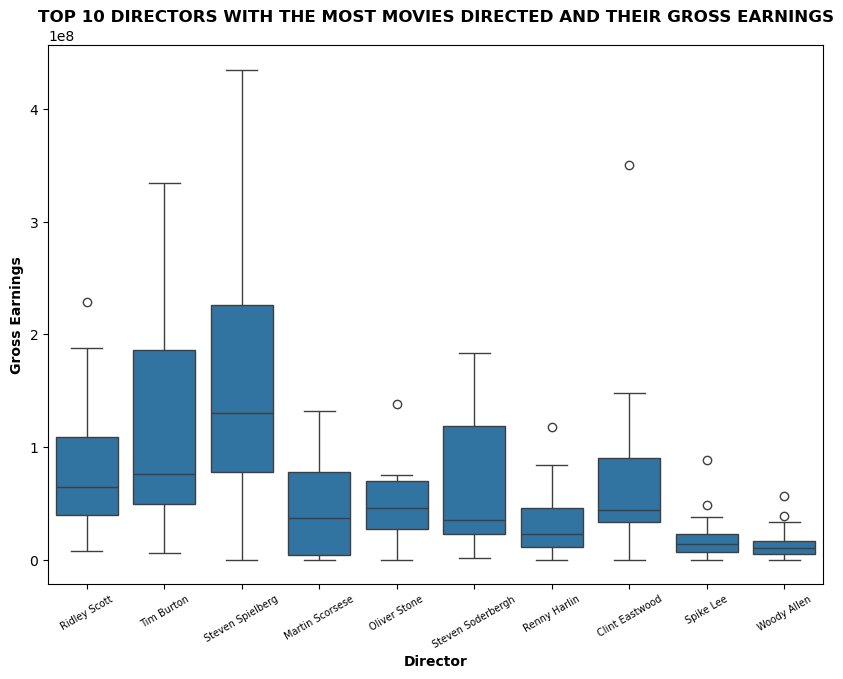

In [914]:
# print boxplot for their gross earnings
plt.figure(figsize = (10, 7))
sns.boxplot(x = "director_name", y = "gross", data = top10_bymostmovies_directors)
plt.xticks(fontsize = 7, rotation = 30)
plt.title("TOP 10 DIRECTORS WITH THE MOST MOVIES DIRECTED AND THEIR GROSS EARNINGS", fontweight = "bold")
plt.xlabel("Director", fontweight = "bold")
plt.ylabel("Gross Earnings", fontweight = "bold")
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

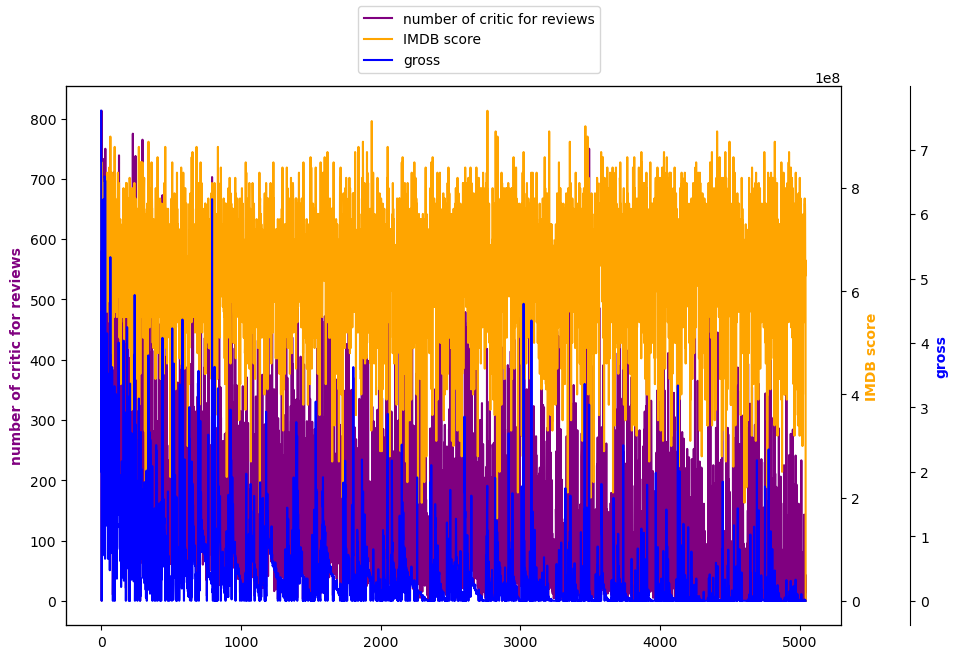

In [917]:
fig, ax1 = plt.subplots(figsize=(10, 7))

# number of critic for reviews
ax1.plot(data["num_critic_for_reviews"], label = "number of critic for reviews", color = "purple")
ax1.set_ylabel("number of critic for reviews", color = "purple", fontweight = "bold")

# IMDB score
ax2 = ax1.twinx()
ax2.plot(data["imdb_score"], label = "IMDB score", color = "orange")
ax2.set_ylabel("IMDB score", color = "orange", fontweight = "bold")

# gross
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(data["gross"], label = "gross", color = "blue")
ax3.set_ylabel("gross", color = "blue", fontweight = "bold")

fig.legend(loc = "upper center")
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [919]:
data["sales"] = data["gross"] - data["budget"]
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,5936.476190
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15749.476190
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333,16015.047619
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333,55727.476190
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667,66.380952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333,5155.761905
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000,2.285714
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000,845.428571
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667,114.523810


## Which directors garnered the most total sales?

In [921]:
top10_bysales_directors = data.groupby("director_name")["sales"].sum()
top10_bysales_directors = top10_bysales_directors.sort_values(ascending = False)
top10_bysales_directors.head()

director_name
Steven Spielberg    2.451332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
Name: sales, dtype: float64

# Plot sales and average likes as a scatterplot. Fit it with a line.

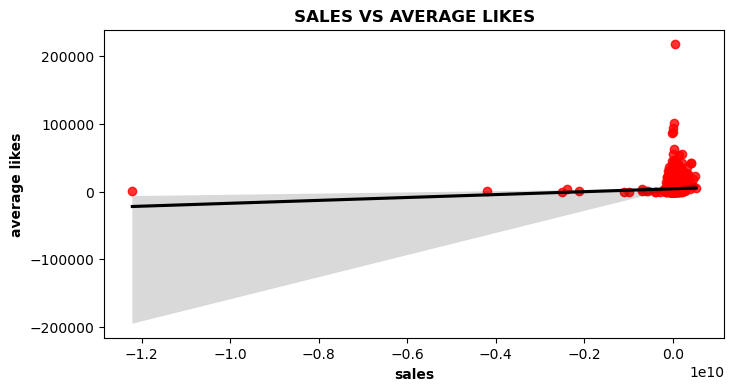

In [923]:
data["average_likes"] = data.filter(like = "likes").mean(axis = 1)

plt.figure(figsize = (8,4))
sns.regplot(x = "sales", y = "average_likes", data = data, scatter_kws = {"color":"red"}, line_kws = {"color":"black"})

plt.xlabel("sales", fontweight = "bold")
plt.ylabel("average likes", fontweight = "bold")
plt.title("SALES VS AVERAGE LIKES", fontweight = "bold")
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

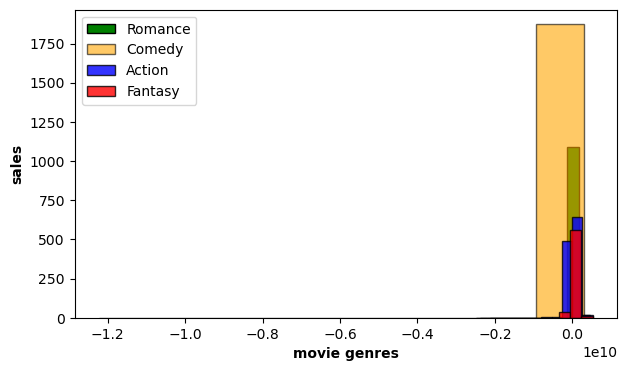

In [925]:
romance_sales = data[data["genres"].str.contains("Romance")]["sales"]
comedy_sales = data[data["genres"].str.contains("Comedy")]["sales"]
action_sales = data[data["genres"].str.contains("Action")]["sales"]
fantasy_sales = data[data["genres"].str.contains("Fantasy")]["sales"]

plt.figure(figsize = (7,4))
plt.hist(romance_sales, label = "Romance", color = "green", edgecolor = "black", alpha = 1)
plt.hist(comedy_sales, label = "Comedy", color = "orange", edgecolor = "black", alpha = 0.6)
plt.hist(action_sales, label = "Action", color = "blue", edgecolor = "black", alpha = 0.8)
plt.hist(fantasy_sales, label = "Fantasy", color = "red", edgecolor = "black", alpha = 0.8)

plt.xlabel("movie genres", fontweight = "bold")
plt.ylabel("sales", fontweight = "bold")
plt.legend()
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [927]:
data["average_actor_likes"] = data[["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]].mean(axis = 1)
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,5936.476190
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15749.476190
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333,16015.047619
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333,55727.476190
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667,66.380952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333,5155.761905
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000,2.285714
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000,845.428571
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667,114.523810


## Copying the whole dataframe

In [932]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,5936.476190
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15749.476190
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333,16015.047619
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333,55727.476190
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667,66.380952


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [937]:
numeric_column = df.select_dtypes(include=["int64", "float64"])

for column in numeric_column.columns:
    min = numeric_column[column].min()
    max = numeric_column[column].max()
    df["nm_numeric_column"] = (numeric_column[column] - min) / (max - min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,average_likes,nm_numeric_column
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,5936.476190,0.027154
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15749.476190,0.072040
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333,16015.047619,0.073255
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333,55727.476190,0.254904
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667,66.380952,0.000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333,5155.761905,0.023583
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000,2.285714,0.000010
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000,845.428571,0.003867
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667,114.523810,0.000524
